## Stroke Prediction (A Classification Project)

**Today we are working on the Stroke Prediction Project..**

- The Stroke Prediction dataset is being downloaded from kaggle.
> To know more about the dataset which we are using refer to :- https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

In [1]:
# So let's get started..

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
stroke_data = pd.read_csv("C:\\Users\\raj28\\OneDrive\\Desktop\\Datasets\\Stroke_prediction_data.csv")

In [4]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
# Let's look at the  value counts of categories present in each column.

In [8]:
# But firstly we will drop the "id" column from our dataset because it doesn't make any sense in our prediction.

In [9]:
stroke_data.drop(["id"], axis = 1,inplace = True)

In [10]:
# Let's seperate the Categorical columns and Continuous columns
categorical_columns = ["gender","ever_married","work_type","Residence_type","smoking_status"]
continuous_val_columns = ["age","avg_glucose_level","bmi"]

In [12]:
# We will use for loop to look at all the value counts of columns in our dataset.
for f in categorical_columns + ['stroke']:
    print(f + ':')
    print(stroke_data[f].value_counts(), '\n')

gender:
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64 

ever_married:
Yes    3353
No     1757
Name: ever_married, dtype: int64 

work_type:
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64 

Residence_type:
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64 

smoking_status:
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64 

stroke:
0    4861
1     249
Name: stroke, dtype: int64 



In [ ]:
# Pie Chart for the "gender" feature.

([<matplotlib.patches.Wedge at 0x1ed0eab3220>,
 [Text(-1.0601790493901062, -0.29329231703931635, 'Female'),
  Text(1.0603591788613849, 0.29264041382626843, 'Male'),
  Text(0.0006763907511958101, 1.099999792043413, 'Other')],
 [Text(-0.5782794814855124, -0.1599776274759907, '58.6%'),
  Text(0.5783777339243917, 0.1596220439052373, '41.4%'),
  Text(0.0003689404097431691, 0.5999998865691343, '0.0%')])

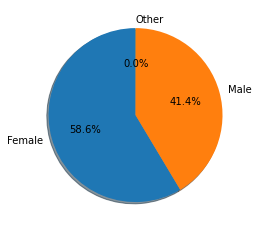

In [207]:
labels =stroke_data['gender'].value_counts(sort = True).index
sizes = stroke_data['gender'].value_counts(sort = True)
plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90,)

In [ ]:
# From the above pie chart we can conclude that our dataset has more number of female records than male and also we have nearly 0% of values of the third category "Other".

In [191]:
# Now let's move further and solve some questions based on our dataset..

In [192]:
# 1. What is the mean value of BMI for patients who had a stroke?
round(stroke_data[stroke_data["stroke"]==1]["bmi"].mean(),2)

30.07

In [ ]:
# The mean value of BMI is 30.07

In [193]:
# 2. Which gender type had more stroke cases than the other?
stroke_data[stroke_data["stroke"] == 1]["gender"].mode()

0    Female
dtype: object

In [194]:
# Since our dataset contains more number of female responses, so it is difficult to generalize that females have a higher chance of getting a stroke.

In [195]:
# 3. What is the mean age of patients who had a stroke?
round(stroke_data[stroke_data["stroke"]==1]["age"].mean(),0)

68.0

In [196]:
# Therefore the mean age of patients who had a stroke is 68 yrs.

In [197]:
# 4. Did patients who had a stroke also had some heart disease?
stroke_data[stroke_data["stroke"]==1][stroke_data["heart_disease"]==1].shape

<ipython-input-197-9c5cf93a33b9>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  stroke_data[stroke_data["stroke"]==1][stroke_data["heart_disease"]==1].shape


(47, 10)

In [198]:
# So we have 47 instances in our dataset that supports our hypothesis that patients who suffered from stroke also had some heart disease.
# This is around 19% of our dataset.

In [199]:
# Percentage of such instances is :-
47/249 *100

18.87550200803213

In [ ]:
# 5. From all the patients who had a stoke, how many of them lived in urban or rural areas?

In [209]:
# To answer this question lets first look at the value counts of instances of these areas.
stroke_data["Residence_type"].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [ ]:
# So we have approximately equal number of observations.
# Now lets answer this question.

In [201]:
stroke_data[stroke_data["stroke"]==1]["Residence_type"].value_counts()

Urban    135
Rural    114
Name: Residence_type, dtype: int64

In [202]:
# So this result suggests that there are more number of stroke cases in Urban areas.

In [203]:
# 6. What was the median glucose level in the blood of patients who had a stroke?

In [204]:
stroke_data[stroke_data["stroke"]==1]["avg_glucose_level"].median()

105.22

In [ ]:
# All the patients who suffered from stroke had a median glucose level of 105.22 mg/dL. 

In [205]:
# 7. Do the patients who had a stroke also had hypertension?
round(stroke_data[stroke_data["stroke"]==1]["hypertension"].mean(),2)

0.27

In [206]:
# So there are 27% instances which suggests yes.

### Data Cleaning:-

In [13]:
# "smoking_status" column consist of "Unknown" values. We will replace them with NaN values.

In [14]:
stroke_data["smoking_status"].replace("Unknown",np.nan, inplace = True)

In [15]:
# Now we will look at the "bmi" column and try to replace all BMI values less than 12 & more than 60 to NaN values.

In [16]:
stroke_data['bmi'] = stroke_data['bmi'].apply(lambda bmi_value: bmi_value if 12 < bmi_value < 60 else np.nan)


In [17]:
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [18]:
stroke_data.isnull().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   218
smoking_status       1544
stroke                  0
dtype: int64

In [19]:
# Let's find out the percentage of missing values in this two columns.

In [21]:
print("Missing value percentage (bmi): ",stroke_data["bmi"].isnull().sum()/stroke_data.shape[0] * 100)
print("Missing value percentage (smoking_status): ",stroke_data["smoking_status"].isnull().sum()/stroke_data.shape[0] * 100)

Missing value percentage (bmi):  4.26614481409002
Missing value percentage (smoking_status):  30.21526418786693


In [22]:
# Let's visualize this missing values.

<AxesSubplot:>

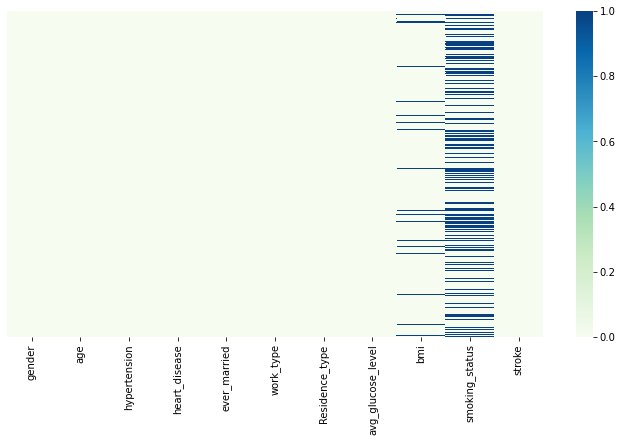

In [23]:
plt.figure(figsize = (12,6))
sns.heatmap(stroke_data.isnull(), yticklabels=False, cmap = "GnBu")

In [24]:
# The smoking_status column consists of many NaN values, so we will drop it.

In [27]:
stroke_data.drop(["smoking_status"], axis = 1, inplace = True)

In [28]:
# Now we replace NaN values of "bmi" column with the Median value of that column.

In [29]:
stroke_data.fillna(stroke_data.median(), inplace = True)

In [30]:
stroke_data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
stroke               0
dtype: int64

In [31]:
# So we have successfully cleaned our dataset.

In [32]:
# Let's plot the correlation plot of all the features.

<AxesSubplot:>

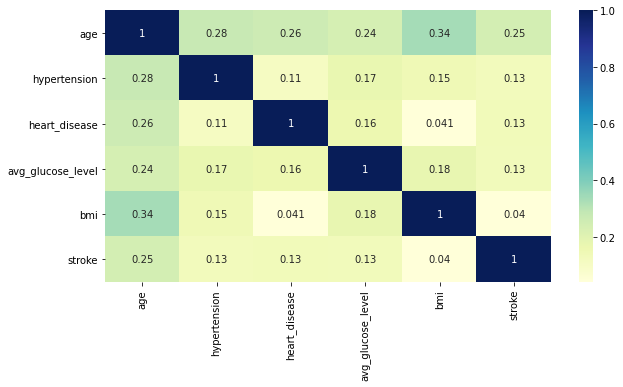

In [36]:
plt.figure(figsize = (10,5))
sns.heatmap(stroke_data.corr(), annot = True,cmap="YlGnBu")

In [37]:
# The 'bmi' feature has very less correlation with our target feature "stroke" so we will drop it from our analysis.

In [38]:
new_df = stroke_data.drop(["bmi"], axis = 1)

In [39]:
new_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,1


In [40]:
# Now we will work on the categorical columns, for that we will use pandas get_dummies method.

In [44]:
# But firstly let's plot some visuals..

C:\Users\raj28\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hypertension', ylabel='count'>

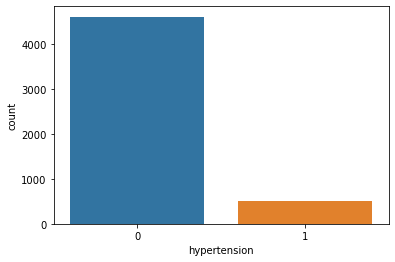

In [42]:
sns.countplot(new_df["hypertension"])

C:\Users\raj28\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

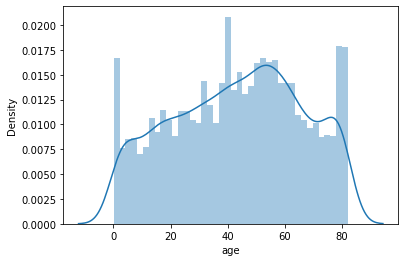

In [46]:
sns.distplot(new_df["age"], bins = 40)

In [49]:
new_df["age"].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
0.48       3
1.40       3
0.16       3
0.08       2
0.40       2
Name: age, Length: 104, dtype: int64

In [50]:
# The 'age' column contains continuous values so we will convert them to discrete. 
# Let's round off the values.

In [51]:
new_df['age'] = new_df['age'].apply(lambda x : round(x))

In [52]:
new_df["age"].head()

0    67
1    61
2    80
3    49
4    79
Name: age, dtype: int64

C:\Users\raj28\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

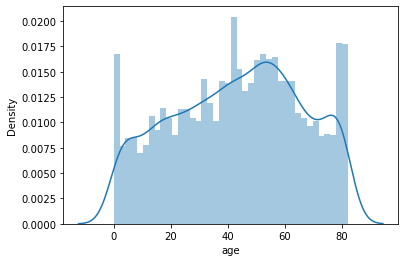

In [53]:
sns.distplot(new_df["age"], bins = 40)

C:\Users\raj28\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ever_married', ylabel='count'>

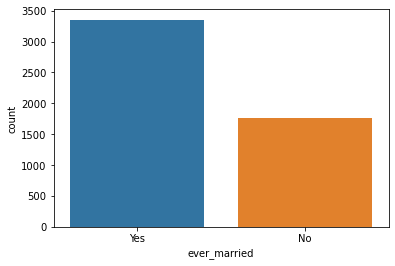

In [54]:
sns.countplot(new_df["ever_married"])

In [210]:
# So now we will move further..

In [55]:
dummy_df = pd.get_dummies(stroke_data[["ever_married","work_type","Residence_type","gender"]],drop_first=True)

In [56]:
dummy_df.head()

,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,gender_Male,gender_Other
0,1,0,1,0,0,1,1,0
1,1,0,0,1,0,0,0,0
2,1,0,1,0,0,0,1,0
3,1,0,1,0,0,1,0,0
4,1,0,0,1,0,0,0,0


In [57]:
dummy_df.shape

(5110, 8)

In [58]:
remove_cols = ["ever_married","work_type","Residence_type","gender"]
new_df = new_df.drop(remove_cols, axis = 1)

In [59]:
new_df.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'stroke'], dtype='object')

In [60]:
new_df = pd.concat([new_df, dummy_df], axis = 1)

In [61]:
new_df.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'stroke',
       'ever_married_Yes', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'gender_Male', 'gender_Other'],
      dtype='object')

In [62]:
# Now let's look at the countplot of our target columnn "stroke".

C:\Users\raj28\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

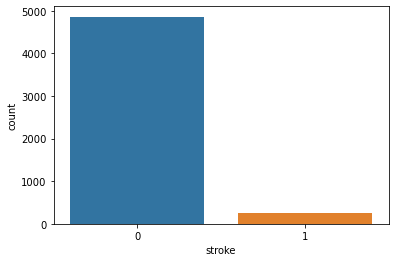

In [63]:
sns.countplot(new_df["stroke"])

In [64]:
# So in our analysis, the output column is highly imbalanced.

In [66]:
# So we will try to balance it out. We will do this by oversampling the "stroke" column using SMOTE.

In [67]:
import imblearn

In [68]:
from imblearn.over_sampling import SMOTE

In [70]:
X = new_df.drop(["stroke"], axis = 1)
y = new_df["stroke"]

In [71]:
oversample = SMOTE(random_state=101)

<AxesSubplot:xlabel='stroke', ylabel='count'>

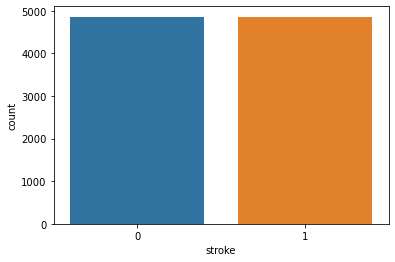

In [72]:
X , y = oversample.fit_resample(X,y)
sns.countplot(x=y)

In [73]:
# So we are ready to go forward for training our model, but lastly we have to do feature scaling on our dataset.

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
scaler = StandardScaler()

In [76]:
X_scaled = scaler.fit_transform(X)

In [77]:
X_scaled.shape

(9722, 12)

In [211]:
# Splitting the training and testing data.

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
 X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=101)

In [80]:
# Now we are ready to train some classification models..
# We will try to build a number of classification models and select the one with the better accuracy.

In [81]:
# 1. Logistic Regression Model..

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
log_model = LogisticRegression(max_iter=1000)

In [84]:
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [85]:
model1_pred = log_model.predict(X_test)

In [86]:
# Let's test the performance of our model.

In [102]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,accuracy_score

In [98]:
print("Classification Report:\n",classification_report(y_test,model1_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81      1250
           1       0.79      0.83      0.81      1181

    accuracy                           0.81      2431
   macro avg       0.81      0.81      0.81      2431
weighted avg       0.81      0.81      0.81      2431



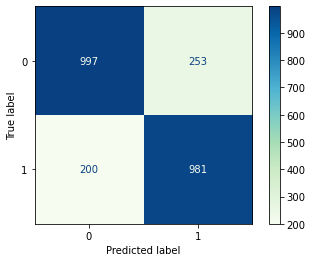

In [105]:
plot_confusion_matrix(log_model,X_test,y_test, cmap = "GnBu")

In [101]:
print(f"Accuracy Score: {round(accuracy_score(y_test,model1_pred)*100, 2)}% ")

Accuracy Score: 81.37% 


In [106]:
# 2. K Nearest Neighbors..

In [107]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# The KNN object will take a parameter "n_neighbours" or "K". So let's the find the best value for "K". We are doing this because it is the most important parameter for the accuracy of the KNN model.

In [108]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [212]:
# Let's visualize the outcomes of the above line of codes.

Text(0, 0.5, 'Error Rate')

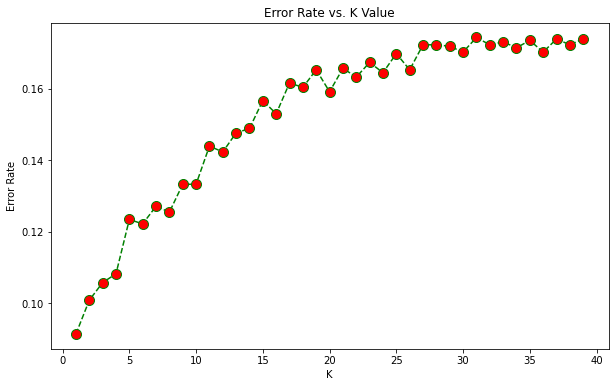

In [213]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='green', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [214]:
# So from the above figure the best value for K would be 1 since it has the least error.

WITH K=1


              precision    recall  f1-score   support

           0       0.95      0.87      0.91      1250
           1       0.87      0.95      0.91      1181

    accuracy                           0.91      2431
   macro avg       0.91      0.91      0.91      2431
weighted avg       0.91      0.91      0.91      2431





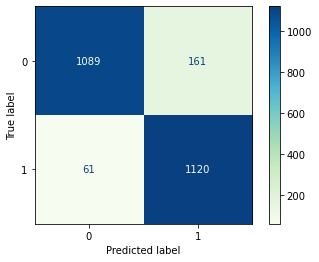

In [112]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(classification_report(y_test,pred))
print('\n')
plot_confusion_matrix(knn,X_test,y_test,cmap = "GnBu")

In [113]:
print(f"Accuracy Score: {round(accuracy_score(y_test,pred)*100)}%")

Accuracy Score: 91.0%


In [124]:
# 3. Support vector machines model..

In [114]:
from sklearn.svm import SVC

In [115]:
svc = SVC()

In [116]:
svc.fit(X_train,y_train)

SVC()

In [117]:
model3_pred = svc.predict(X_test)

In [118]:
print("Classification Report:\n",classification_report(y_test,model3_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.82      1250
           1       0.79      0.85      0.82      1181

    accuracy                           0.82      2431
   macro avg       0.82      0.82      0.82      2431
weighted avg       0.82      0.82      0.82      2431



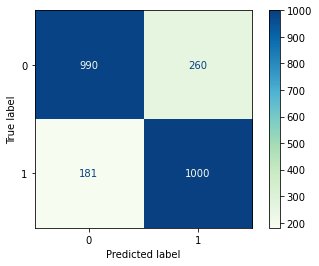

In [119]:
plot_confusion_matrix(svc,X_test,y_test,cmap = "GnBu")

In [123]:
print(f"Accuracy Score: {round(accuracy_score(y_test,model3_pred)*100)}%")

Accuracy Score: 82.0%


In [125]:
# 4. Decision Tree Model..

In [126]:
from sklearn.tree import DecisionTreeClassifier

In [127]:
dtree = DecisionTreeClassifier()

In [128]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [130]:
model4_pred = dtree.predict(X_test)

In [131]:
print('Classification Report: \n',classification_report(y_test,model4_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.87      0.90      1250
           1       0.87      0.92      0.90      1181

    accuracy                           0.90      2431
   macro avg       0.90      0.90      0.90      2431
weighted avg       0.90      0.90      0.90      2431



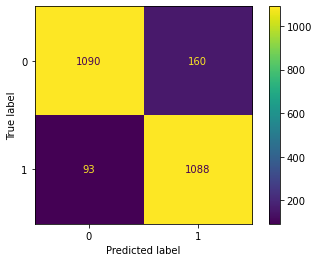

In [132]:
plot_confusion_matrix(dtree,X_test,y_test)

In [133]:
print(f"Accuracy Score: {round(accuracy_score(y_test,model4_pred)*100)}%")

Accuracy Score: 90.0%


In [134]:
# 5. Random Forest Model..

In [135]:
from sklearn.ensemble import RandomForestClassifier

In [136]:
rfc = RandomForestClassifier(n_estimators=250)

In [137]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=250)

In [138]:
model5_pred = rfc.predict(X_test)

In [139]:
print('Classification Report:\n',classification_report(y_test,model5_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91      1250
           1       0.89      0.94      0.91      1181

    accuracy                           0.91      2431
   macro avg       0.91      0.91      0.91      2431
weighted avg       0.91      0.91      0.91      2431



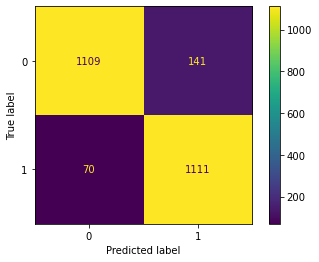

In [140]:
plot_confusion_matrix(rfc,X_test,y_test)

In [141]:
print(f"Accuracy Report: {round(accuracy_score(y_test,model5_pred)*100)}%")

Accuracy Report: 91.0%


In [142]:
# So the two models which gave us the best accuracy of 91% were K-Nearest Neighbors and Random Forest Models.